In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
movie_titles_df = pd.read_csv('../data/Movie_Id_Titles.csv')
movie_titles_df

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [26]:
movie_rating_df = pd.read_csv('../data/user_rating.csv')
movie_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [14]:
movie_titles_df['title'].nunique() # 재상영?

1664

In [22]:
movie_titles_df['item_id'].nunique()

1682

In [21]:
movie_rating_df['item_id'].nunique()

1682

In [27]:
movie_rating_df = movie_rating_df.drop('timestamp', axis=1) # 영화추천시스템에 필요 없음.
# loc로 슬라이싱해도 ㄱㅊ

In [17]:
movie_rating_df.head(2)

,user_id,item_id,rating
0,0,50,5
1,0,172,5


In [19]:
# 두개의 데이터프레임을 합침
# 공통 연결고리 컬럼이 있는 경우 합치는 방법

In [28]:
movie_rating_df = pd.merge(movie_titles_df, movie_rating_df, on='item_id', how='left')
# how를 안 쓸 경우 item_id 갯수가 같아야 합쳐짐. 수가 같지 않으면 데이터 유실
movie_rating_df

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3
...,...,...,...,...
99998,1678,Mat' i syn (1997),863,1
99999,1679,B. Monkey (1998),863,3
100000,1680,Sliding Doors (1998),863,2
100001,1681,You So Crazy (1994),896,3


In [32]:
# 각 영화별로, 기본 통계치 보이기
movie_rating_df.groupby('title')['rating'].describe() # title로 묶어서 rating컬럼을 describe하기.

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


In [33]:
movie_rating_df.groupby('title')['rating'].describe().sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
They Made Me a Criminal (1939),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Marlene Dietrich: Shadow and Light (1996),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
"Saint of Fort Washington, The (1993)",2.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Someone Else's America (1995),1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
Star Kid (1997),3.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
King of New York (1990),1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
Touki Bouki (Journey of the Hyena) (1973),1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0


In [35]:
# 각 영화별 별점의 평균을 구하고
# 이름 rating_df_mean이라는 변수로 저장
rating_df_mean = movie_rating_df.groupby('title')['rating'].mean()
rating_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [36]:
# 각 영화별 리뷰는 몇개가 있는지 구하고,
# 이를 rating_df_count라는 변수에 저장
rating_df_count = movie_rating_df.groupby('title')['rating'].count()
rating_df_count

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [42]:
# 시리즈는 1차원, 데이터프레임은 2차원
df1 = rating_df_mean.to_frame()

In [45]:
# 컬럼명 바꾸는 rename과는 다른 방법
df1.columns = ['mean'] # 컬럼이 하나기에 빠르게 가능.

In [43]:
df2 = rating_df_count.to_frame()
df2.rename(columns={'rating' : 'count'}, inplace=True)

In [46]:
df1.head(1)

,mean
title,
'Til There Was You (1997),2.333333


In [48]:
df2.head(1)

,count
title,
'Til There Was You (1997),9


In [49]:
rating_mean_count_df = df1.join(df2) # 인덱스가 같으면 붙여줌. 컬럼이름이 달라야됨.
rating_mean_count_df.head(2)

,mean,count
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5


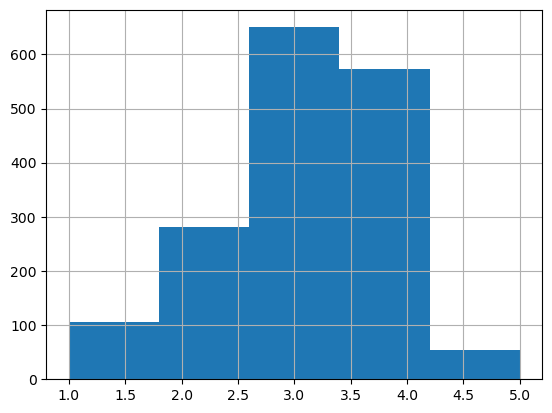

In [53]:
rating_mean_count_df['mean'].hist(bins=5)
plt.show()

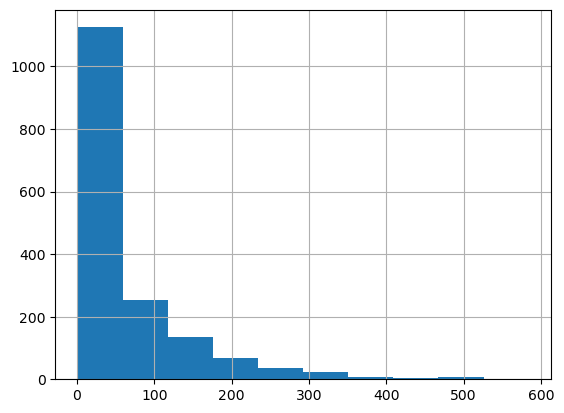

In [54]:
rating_mean_count_df['count'].hist()
plt.show()

In [55]:
# 리뷰갯수가 500개 이상 되는 영화를 확인해보자.
rating_mean_count_df[rating_mean_count_df['count'] >= 500]

,mean,count
title,,
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Star Wars (1977),4.359589,584


In [56]:
# 영화추천 시스템 개발
# item based collaborative Filtering 기법

# 영화간의 유사도를 측정할건데, 유사도는 상관계수로 측정할거다.

In [59]:
# 상관계수는 두 컬럼과의 관계
# 영화제목을 컬럼으로 해야 영화간의 상관계수가 나옴.
# 인덱스는 유저id
movie_rating_df.corr() # 원하는대로 안 나옴.

C:\Users\405\AppData\Local\Temp\ipykernel_5592\3076218130.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie_rating_df.corr() # 원하는대로 안 나옴.


,item_id,user_id,rating
item_id,1.000000,0.010425,-0.189119
user_id,0.010425,1.000000,-0.009377
rating,-0.189119,-0.009377,1.000000


In [61]:
movie_rating_df['user_id'].nunique()

944

In [63]:
df = movie_rating_df.pivot_table(columns='title', index='user_id', values='rating', aggfunc='mean')
# aggfunc는 중복된 값을 평균내서 값을 반환

In [64]:
df.head(3)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# 타이타닉 영화와 전체 영화의 상관계수를 구하라

# 즉, 특정 컬럼과 전체 컬럼의 상관계수 구하는 방법
# 타이타닉과 모든 영화의 상관계수 측정
corr_titanic = df.corrwith( df['Titanic (1997)'] )

c:\Users\405\anaconda3\envs\app_dash\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\405\anaconda3\envs\app_dash\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [71]:
corr_titanic = corr_titanic.to_frame()
corr_titanic.head(3)

,0
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN
101 Dalmatians (1996),0.120113


In [72]:
corr_titanic.columns = ['correlation']
corr_titanic.head(2)

,correlation
title,
'Til There Was You (1997),-0.062017
1-900 (1994),NaN


In [76]:
rating_mean_count_df['count'] # 인덱스가 같음.

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: count, Length: 1664, dtype: int64

In [77]:
corr_titanic = corr_titanic.join(rating_mean_count_df['count'])

In [78]:
corr_titanic.head(2)

,correlation,count
title,,
'Til There Was You (1997),-0.062017,9
1-900 (1994),NaN,5


In [79]:
corr_titanic.dropna(inplace=True) # 상관없는거 제외

In [81]:
corr_titanic.sort_values('correlation', ascending=False) # count가 낮은 것도 포함됨

,correlation,count
title,,
Nadja (1994),1.0,8
"Pest, The (1997)",1.0,8
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3
For Ever Mozart (1996),1.0,3
"Jerky Boys, The (1994)",1.0,3
...,...,...
Pather Panchali (1955),-1.0,8
Angel Baby (1995),-1.0,4
Blood Beach (1981),-1.0,6


In [82]:
# 위 코드는 count가 적은 것도 포함돼서 신뢰도가 적으므로
# 따라서 리뷰 갯수가 80개 이상인 데이터를 가지고 상관계수를 보자.

In [85]:
corr_titanic[corr_titanic['count'] >= 80].sort_values('correlation', ascending=False).drop('Titanic (1997)', axis=0)

,correlation,count
title,,
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
...,...,...
Brazil (1985),-0.243532,208
Richard III (1995),-0.275451,89
Cold Comfort Farm (1995),-0.307150,125
